# Unsupervised Machine Learning Technique

# What is K means used for?

### The K-means clustering algorithm is an Unsupervised Machine Learning Technique used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

In [1]:
# Importing the necessary modules

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and view the dataset

df = pd.read_csv(r'C:\Users\singhegm\Downloads\f7bfaafdeea4edee828a010e60897c68\Clustering\Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Perform EDA

In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

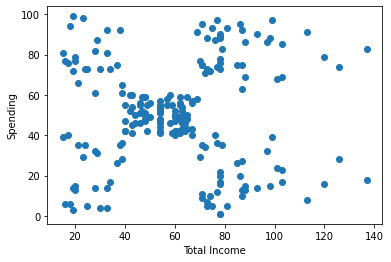

In [6]:
plt.scatter(x[...,0], x[...,1])
plt.xlabel('Total Income')
plt.ylabel('Spending')
plt.show()

# How does KMeans work?

### The k-means clustering algorithm attempts to split a given anonymous data set (a set containing no information as to class identity) into a fixed number (k) of clusters. Initially k number of so called centroids are chosen. Each centroid is thereafter set to the arithmetic mean of the cluster it defines.

### K-means clustering algorithm computes the centroids and iterates until we it finds optimal centroid. It assumes that the number of clusters are already known. It is also called flat clustering algorithm. The number of clusters identified from data by algorithm is represented by 'K' in K-means.

# The method of selection of the number of centroids in a k-means algorithm-
1.	Select k initial centroids. These will be the center point for each segment.
2.	Use a Distance measure (maybe – Euclidean or Manhattan) to find the distance of every object to centroid d (Oi, Cj).
3.	Assign each object to nearest centroid.
4.	Re-compute the centroids – finding Means.
5.	Repeat from 2 until the terminating condition or data points stay in same cluster.

In [7]:
from sklearn.cluster import KMeans

wcsse = [] # sum of sq. errors with each clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcsse.append(kmeans.inertia_)

C:\Users\singhegm\Anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
wcsse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413]

# How do you find the 'k' value using elbow method?

### The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

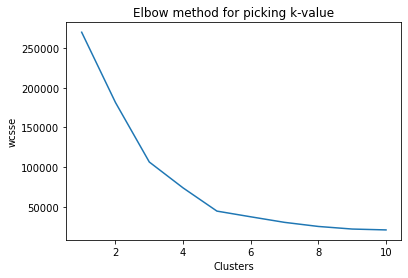

In [9]:
plt.plot(range(1, 11), wcsse)
plt.title("Elbow method for picking k-value")
plt.xlabel("Clusters")
plt.ylabel("wcsse")
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### KMeans have now divided the datapoints into 5 clusters (0, 1, 2, 3, 4)

In [11]:
# Total Income and Spendings of the datapoints in cluster 0 

x[y_kmeans == 0]

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

In [12]:
# Total Income of the datapoints in cluster 0

x[y_kmeans == 0, 0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [13]:
# Spendings of the datapoints in cluster 0

x[y_kmeans == 0, 1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

In [14]:
# Also we can check for all other clusters

## Plot the k-means cluster graph to view the number of clusters and the distribution of datapoints

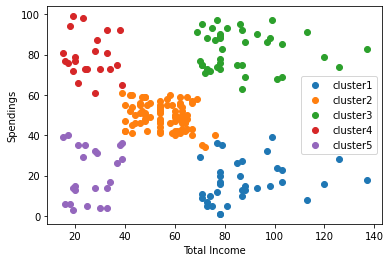

In [15]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], label = 'cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], label = 'cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], label = 'cluster3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], label = 'cluster4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], label = 'cluster5')

plt.xlabel('Total Income')
plt.ylabel('Spendings')
plt.legend()
plt.show()

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
# We can modify our data along with the customer clsuter category to easily view which customer belongs to what cluster

df['clsuter_category'] = y_kmeans
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clsuter_category
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


#  K-Means Advantages : 
1. If variables are huge, then K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls. 
2. K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular.

# K-Means Disadvantages :

1. Difficult to predict K-Value.
2. With global cluster, it didn't work well.
3. Different initial partitions can result in different final clusters.
4. It does not work well with clusters (in the original data) of Different size and Different density.